<a href="https://colab.research.google.com/github/shubham-11700069/INT247-mini-Project-Occupancy/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
***
## <font color=Black>Name: Shubham Garad &nbsp;&nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Reg. No.: 11700069 <br>Roll No.: 62 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Guided by: Sanjay Kumar Singh <br>Subject Code: INT247 </font>
***
<hr>

<h1><font color=Green>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Minor project for Machine Learning </font></h1>
***
***

 <h3> Dataset Name: <font color=#cca300>Occupancy Detection Dataset</font> </h3>
 <h3> Dataset Url: 'https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+'</h3>
 <h3>Dataset Attribute Information:</h3>
> **date- <font color=#008000> &emsp; *time year-month-day hour:minute:second*</font><br>
Temperature- <font color=#008000> &emsp; *in Celsius*</font><br>
Relative Humidity- <font color=#008000> &emsp; *%*</font><br>
Light- <font color=#008000> &emsp; *in Lux*</font><br>
CO2- <font color=#008000> &emsp; *in ppm*</font><br>
Humidity Ratio- <font color=#008000> &emsp; *Derived quantity from temperature* </font><br>
relative humidity- <font color=#008000> &emsp; *in kgwater-vapor/kg-air*</font><br>
Occupancy- <font color=#008000> &emsp; *0 or 1, <font color= orange> 0</font> for not occupied, <font color=orange> 1</font> for occupied status*</font>**

  ***
  - ### Abstract view of dataset
  <img src = "MinorProjectDataset.png", alt="Abstract view of dataset", title= "Dataset Abstracts">
  

***
- ### Loading the csv files

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dftrain=pd.read_csv("INT247-mini-Project-Occupancy-Data/datatraining.txt") #Location of training dataset
dftest1=pd.read_csv("INT247-mini-Project-Occupancy-Data/datatest.txt") #Location of training dataset 1
dftest2=pd.read_csv("INT247-mini-Project-Occupancy-Data/datatest2.txt") #Location of training dataset 2

***
- ### Building feature set

In [0]:
#print(dftrain.shape)
#print(dftrain.iloc[:2])
x_train=dftrain.iloc[:,1:6]
#print(x_train.shape)
#print(x_train.iloc[:2])
y_train=dftrain.iloc[:,6]
#print(y_train.shape)
#print(y_train.iloc[:2])

***
- ### Creating Train-test split

In [0]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test=train_test_split(x_train,y_train,test_size=0.3,random_state=1)
#print("x_train shape=",x_train.shape)
#print("y_train shape=",y_train.shape)
#print("x_test shape=",x_test.shape)
#print("y_test shape=",y_test.shape)

***
###  <font color=red> As the dataset is already splitted so we don't need to split it intresively </font>
**Creating testing set 1**

In [0]:
#print(dftest1.shape)
#print(dftest1.iloc[:2])
x_test1=dftest1.iloc[:,1:6]
#print(x_test1.shape)
#print(x_test1.iloc[:2])
y_test1=dftest1.iloc[:,6]
#print(y_test1.shape)
#print(y_test1.iloc[:2])

**Creating testing set 2**

In [0]:
#print(dftest2.shape)
#print(dftest2.iloc[:2])
x_test2=dftest2.iloc[:,1:6]
#print(x_test2.shape)
#print(x_test2.iloc[:2])
y_test2=dftest2.iloc[:,6]
#print(y_test2.shape)
#print(y_test2.iloc[:2])

***
- ### Standardizing the Occupancy

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test1_std=sc.transform(x_test1) ## for test set1
x_test2_std=sc.transform(x_test2) ## for test set2
#print(x_train_std)
#print(x_test1_std)
#print(x_test2_std)

***
- ### Evaluating the accuracy of SVM for C=1

In [152]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm=SVC(kernel='linear',C=1, random_state=1)
svm.fit(x_train,y_train) # for non standard data
y_pred1=svm.predict(x_test1)  ## predicting for test set 1
y_pred2=svm.predict(x_test2)  ## predicting for test set 2
print("Accuracy of SVM for 'non standardized' data for test set 1 with C=1 : '%.2f' "%accuracy_score(y_pred1,y_test1))
print("Accuracy of SVM for 'non standardized' data for test set 2 with C=1 : '%.2f' "%accuracy_score(y_pred2,y_test2))
svm.fit(x_train_std,y_train) # for standard data
y_pred1_std=svm.predict(x_test1_std) ## predicting for test set 1
y_pred2_std=svm.predict(x_test2_std) ## predicting for test set 2
print("Accuracy of SVM for 'standardized' data for test set 1 with C=1 : '%.2f' "%accuracy_score(y_pred1_std,y_test1))
print("Accuracy of SVM for 'standardized' data for test set 2 with C=1 : '%.2f' "%accuracy_score(y_pred2_std,y_test2))

Accuracy of SVM for 'non standardized' data for test set 1 with C=1 : '0.98' 
Accuracy of SVM for 'non standardized' data for test set 2 with C=1 : '0.99' 
Accuracy of SVM for 'standardized' data for test set 1 with C=1 : '0.98' 
Accuracy of SVM for 'standardized' data for test set 2 with C=1 : '0.99' 


***
- ### Finding the best C from 0 to 10 and kernels= linear, rbf

In [0]:
ls_y_pred1=[[],[]]
ls_y_pred2=[[],[]]
ls_y_pred1_std=[[],[]]
ls_y_pred2_std=[[],[]] # 2d list row 1 for rbf and row 2 for linear kernel
ls_models=[[],[],[],[]]

In [0]:
for j in range(1,10):
        svm=SVC(kernel='rbf',gamma=0.7, C=j, random_state=1)
        ls_models[0].append(svm.fit(x_train,y_train))  ##ls_model is used afterwoeds for svm ploting
        y_pred1=svm.predict(x_test1)
        acc_y_pred1=accuracy_score(y_pred1,y_test1)
        y_pred2=svm.predict(x_test2)
        acc_y_pred2=accuracy_score(y_pred2,y_test2)
        #print("Accuracy of SVM for non standardized data for test set 1 with kernel=rbf : '%.2f' "%(acc_y_pred1))
        ls_y_pred1[0].append(acc_y_pred1)
        #print("Accuracy of SVM for non standardized data for test set 2 with kernel=rbf : '%.2f' "%(acc_y_pred2))
        ls_y_pred2[0].append(acc_y_pred2)
        
        ########################### for standardized data ###########################
        
        ls_models[1].append(svm.fit(x_train_std,y_train))
        y_pred1_std=svm.predict(x_test1_std)
        acc_y_pred1_std=accuracy_score(y_pred1_std,y_test1)
        y_pred2_std=svm.predict(x_test2_std)
        acc_y_pred2_std=accuracy_score(y_pred2_std,y_test2)
        #print("Accuracy of SVM for standardized data for test set 1 with kernel=rbf : '%.2f' "%(acc_y_pred1_std))
        ls_y_pred1_std[0].append(acc_y_pred1_std)
        #print("Accuracy of SVM for standardized data for test set 2 with kernel=rbf : '%.2f' "%(acc_y_pred2_std))    
        ls_y_pred2_std[0].append(acc_y_pred2_std)    

In [0]:
for j in range(1,10):
        svm=SVC(kernel='linear', C=j, random_state=1)
        ls_models[2].append(svm.fit(x_train,y_train))
        y_pred1=svm.predict(x_test1)
        acc_y_pred1=accuracy_score(y_pred1,y_test1)
        y_pred2=svm.predict(x_test2)
        acc_y_pred2=accuracy_score(y_pred2,y_test2)
        #print("Accuracy of SVM for non standardized data for test set 1 with kernel=linear : '%.2f' "%(acc_y_pred1))
        ls_y_pred1[1].append(acc_y_pred1)
        #print("Accuracy of SVM for non standardized data for test set 2 with kernel=linear : '%.2f' "%(acc_y_pred2))
        ls_y_pred2[1].append(acc_y_pred2)
        
        ########################### for standardized data ###########################
        
        ls_models[3].append(svm.fit(x_train_std,y_train))
        y_pred1_std=svm.predict(x_test1_std)
        acc_y_pred1_std=accuracy_score(y_pred1_std,y_test1)
        y_pred2_std=svm.predict(x_test2_std)
        acc_y_pred2_std=accuracy_score(y_pred2_std,y_test2)
        #print("Accuracy of SVM for standardized data for test set 1 with kernel=linear : '%.2f' "%(acc_y_pred1_std))
        ls_y_pred1_std[1].append(acc_y_pred1_std)
        #print("Accuracy of SVM for standardized data for test set 2 with kernel=linear : '%.2f' "%(acc_y_pred2_std))    
        ls_y_pred2_std[1].append(acc_y_pred2_std) 

***
## <font color="red"> <center>Visulalizing the Results and Compairing Performances</center></font>
***
<br>
- **Ploting for different values of C **

*   List item
*   List item



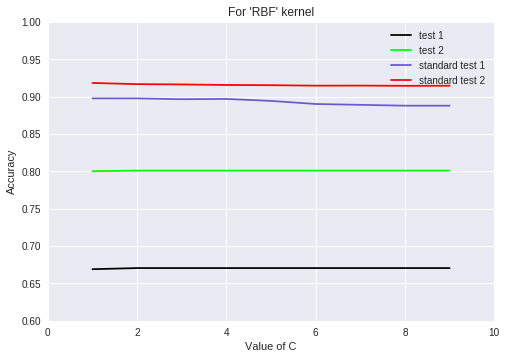

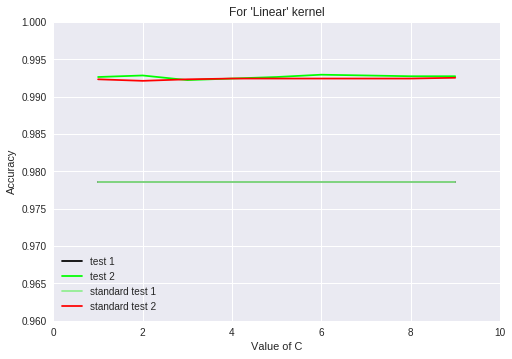

In [150]:
#print(ls_y_pred1[0])
#print(ls_y_pred1[1])
plt.figure()
plt.plot(np.arange(1,10), ls_y_pred1[0],label="test 1", color="black")
plt.plot(np.arange(1,10), ls_y_pred2[0],label="test 2", color="lime")
plt.plot(np.arange(1,10), ls_y_pred1_std[0], label="standard test 1", color="slateblue")
plt.plot(np.arange(1,10), ls_y_pred2_std[0],label="standard test 2", color="red")
plt.ylabel('Accuracy')
plt.xlabel('Value of C')
plt.axis([0,10,0.6,1])
plt.title("For 'RBF' kernel")
plt.legend()
plt.show()

plt.plot(np.arange(1,10), ls_y_pred1[1],label="test 1", color="black" )
plt.plot(np.arange(1,10), ls_y_pred2[1],label="test 2", color="lime")
plt.plot(np.arange(1,10), ls_y_pred1_std[1], label="standard test 1", color="lightgreen")
plt.plot(np.arange(1,10), ls_y_pred2_std[1],label="standard test 2", color="red")
plt.ylabel('Accuracy')
plt.xlabel('Value of C')
plt.axis([0,10,0.96,1])
plt.title("For 'Linear' kernel")
plt.legend()
plt.show()


***
- **Compairing over Rbf and Linear K![alt text](https://)ernel **

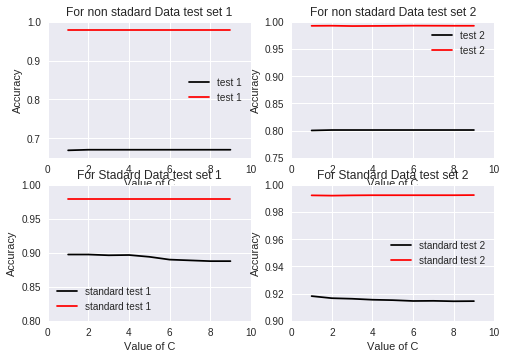

In [129]:
plt.figure()
plt.subplot(221)
plt.plot(np.arange(1,10), ls_y_pred1[0],label="test 1", color="black")
plt.plot(np.arange(1,10), ls_y_pred1[1],label="test 1", color="red")
plt.ylabel('Accuracy')
plt.xlabel('Value of C')
plt.axis([0,10,0.65,1])
plt.title("For non stadard Data test set 1")
plt.legend()

plt.subplot(222)
plt.plot(np.arange(1,10), ls_y_pred2[0],label="test 2", color="black")
plt.plot(np.arange(1,10), ls_y_pred2[1],label="test 2", color="red")
plt.ylabel('Accuracy')
plt.xlabel('Value of C')
plt.axis([0,10,0.75,1])
plt.title("For non stadard Data test set 2")
plt.legend()

plt.subplot(223)
plt.plot(np.arange(1,10), ls_y_pred1_std[0], label="standard test 1", color="black")
plt.plot(np.arange(1,10), ls_y_pred1_std[1], label="standard test 1", color="red")
plt.ylabel('Accuracy')
plt.xlabel('Value of C')
plt.axis([0,10,0.8,1])
plt.title("For Stadard Data test set 1")
plt.legend()

plt.subplot(224)
plt.plot(np.arange(1,10), ls_y_pred2_std[0],label="standard test 2", color="black")
plt.plot(np.arange(1,10), ls_y_pred2_std[1],label="standard test 2", color="red")
plt.ylabel('Accuracy')
plt.xlabel('Value of C')
plt.axis([0,10,0.9,1])
plt.title("For Standard Data test set 2")
plt.legend()
plt.show()


***
- ## <font color='lawngreen'>Comparing Performance with histogram</font>
***

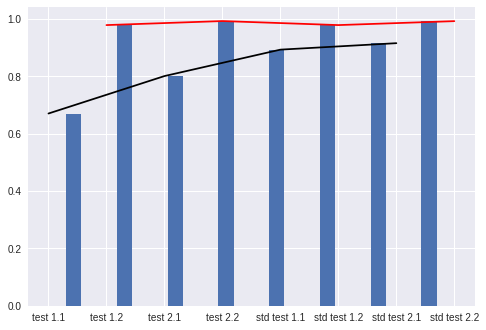

In [149]:
plt.figure()

plt.hist(['test 1.1','test 1.2', 'test 2.1', 'test 2.2', 'std test 1.1','std test 1.2', 'std test 2.1','std test 2.2'],
         bins=8, histtype='bar', align='mid', rwidth=0.3,
         weights=[np.average(ls_y_pred1[0]),np.average(ls_y_pred1[1]),np.average(ls_y_pred2[0]),np.average(ls_y_pred2[1]),np.average(ls_y_pred1_std[0]),
                  np.average(ls_y_pred1_std[1]),np.average(ls_y_pred2_std[0]),np.average(ls_y_pred2_std[1])],orientation='vertical')
plt.plot(['test 1.1', 'test 2.1','std test 1.1', 'std test 2.1'],[np.average(ls_y_pred1[0]),np.average(ls_y_pred2[0]),np.average(ls_y_pred1_std[0]),np.average(ls_y_pred2_std[0])],color="black")
plt.plot(['test 1.2', 'test 2.2','std test 1.2', 'std test 2.2'],[np.average(ls_y_pred1[1]),np.average(ls_y_pred2[1]),np.average(ls_y_pred1_std[1]),np.average(ls_y_pred2_std[1])],color="red")
plt.show()